# Multivariate Regression

This notebook is a tutorial on how to build a regression model that learns from multiple features of a real world data. Specifically, we will use Boston Housing data to estimate the price of a house based on multiple features. Since our model will predict houses prices based on several features (multiple parameters), we call our model multivariate regression model.  

## Dataset Preparation
We can directly load the data from sklearn.datasets module. "load_boston()" function will return a dictionary which will contain our dataset input features, target variables and some metadata that we can access through ".DESCR" property.

In [0]:
from sklearn import datasets                                                    # Import dataset module from sklearn through which, we can load datasets
dataset=datasets.load_boston()                                                  # Load boston dataset

#dataset shape: (506,13) => (Number of data records,Number of features)
print('Dataset X shape:',dataset.data.shape)
print('Dataset Y shape:',dataset.target.shape)

print(dataset.DESCR)

Dataset X shape: (506, 13)
Dataset Y shape: (506,)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value 

In "linear regression with one variable" notebook, we built a linear model with 2 parameters (m and c) and we estimated those parameters through gradient descent and other methods. We can use similar approach for this model:

$$\begin{align}
p^{(i)} &= c_0 x_0^{(i)}+ c_1 x_1^{(i)}+ c_2 x_2^{(i)}+ \dots + c_n x_n^{(i)} \notag
\\
&= \sum_{j=0}^{n} c_j x_j^{(i)}
\end{align}
$$

where $c_{0},c_{1},c_{2},...,c_{n}$ are parameters of linear model.

But with this model, we will only be able to map linear relationship between independent and dependent variables while our parameters might have non-linear relationship with our target variable. Consider following graphs which plots correlations between dependent and each independent variable pairs. 

### Correlation

Correlation measures statistical relationship between two variables. It can be negative or positive between -1 and 1.

* If value of one variable increases with increase in value of the other variable, then the two variables are said to be positively correlated. (+1 means strong positive correlation)

* If value of one variable decreases with increase in the value of other variable, then the two variables are said to be negatively correlated. (-1 means strong negative correlation)

* If increase or decrease in one variable does not affect the value of other variable, then the two variables do not have any linear correlation (correlation = 0) 

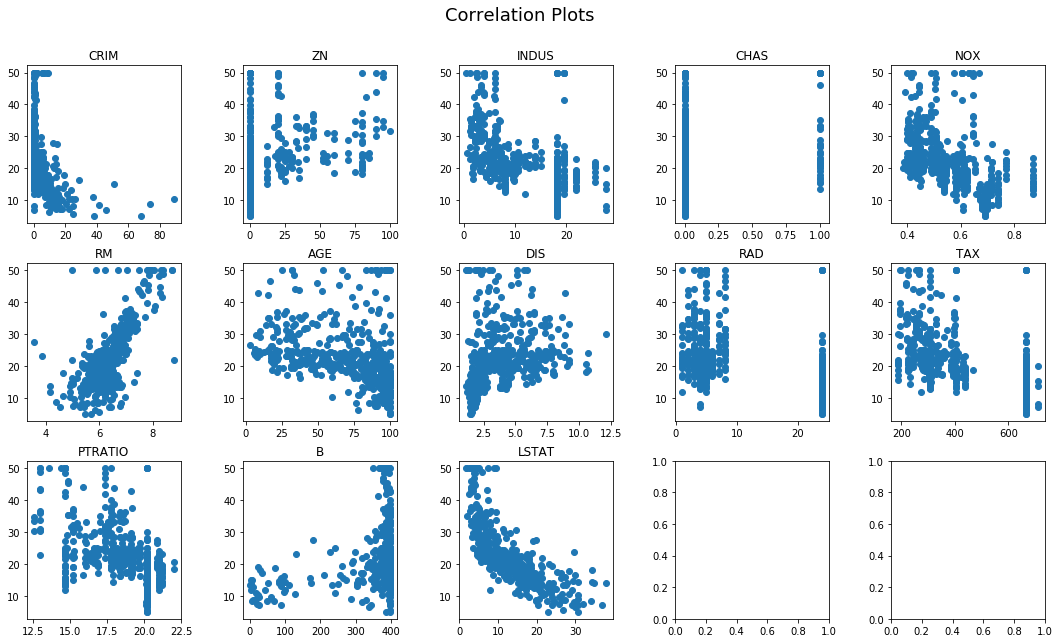

In [0]:
import matplotlib.pyplot as plt                                                 # Import pyplot from matplotlib to plot graphs

X=dataset.data                                                                  # X represents the data and Y represents the respective labels
Y=dataset.target
row,col=dataset.data.shape

fig,ax = plt.subplots(3,5)                                                      # subplots: 3 rows and 5 column (grid)
fig.set_size_inches(18.25, 10.25)                                               # Set height and width of figure in inches
plt.subplots_adjust(top=0.9,hspace=0.25,wspace=0.4,bottom=0.15)                 # To adjust spacing and gap between subplots
fig.suptitle('Correlation Plots',fontsize=18)                                   # Set title of complete figure

c_idx=0
for i in range(3):
    for j in range(5):
        ax[i,j].scatter(X[:,c_idx],Y)
        ax[i,j].set_title(dataset.feature_names[c_idx])
        c_idx+=1
        if(c_idx>=13):                                                          # We only have 13 features. So the loop should exit after plotting them
          break
plt.show()          

As you can see in scatter plots, only RM and LSTAT seem to have positive and negative correlation with home prices respectively. We would only be using RM and LSTAT as our parameters if we are to build a linear model. Therefore, we need a non linear model to use all of our parameters and get good results. We will use a fully connected neural network model here, which can automatically learn weights to be assigned to each parameter in our model and can model non linearity in data.

### Data Normalization
As our input features have different range of values, it affects the training of a model. We first need to normalize all of our features. We normalize each feature by dividing its values with the maximum possible value for that feature. Then, we split the dataset into train, test and validation.

In [0]:
from sklearn.model_selection import train_test_split                            # To split dataset into train and test split
import numpy as np                                                              # Import numpy library

x=dataset.data
y=dataset.target
for i,(minval,maxval) in enumerate(zip(np.amin(x,axis=0),np.amax(x,axis=0))):   # Iterating through parameters and finding maximum, minimum values
  x[:,i]=x[:,i]/maxval                                                          # Dividing each parameter values by maximum possible value for that parameter

  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=7)       # Splitting dataset into train and test set
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.1,random_state=43) # Splitting training set into train and validation set

print()
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_val shape:',x_val.shape)
print('y_val shape:',y_val.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)




x_train shape: (455, 13)
y_train shape: (455,)
x_val shape: (51, 13)
y_val shape: (51,)
x_test shape: (51, 13)
y_test shape: (51,)




## Model Building

Our data has 13 input features. So, our first dense layer (input layer) will have 13 units. Input layer will be followed by 3 intermediate dense layers and 1 output layer containing one single neuron. This neuron will have our output regression value. We will compile our model with MSE loss and will use the same to measure the goodness of fit.

In [0]:
from keras.layers.core import Dense                                             # Import Dense submodule from layers.core module
from keras.models import Sequential                                             # Import sequential submodule from models module
from keras.layers.core import Flatten                                           # To flatten out some input, we have Flatten module/layer


model=Sequential()
model.add(Dense(13,use_bias=True,activation='relu'))                            # Since our input will be our 13 features, so we need 13 neurons in input layer
model.add(Dense(1024,use_bias=True,activation='relu'))                          # A dense layer wth 1024 output units
model.add(Dense(1024,use_bias=True,activation='relu'))                          # A dense layer with 1024 output units
model.add(Dense(10,use_bias=True,activation='relu'))                            # A dense layer with 10 output units
model.add(Dense(1,use_bias=True))


model.compile(loss='mean_squared_error',optimizer='rmsprop',accuracy=['mse','mae'])

## Model Training

We will train our model for 100 epochs with batch_size = 16 and will store the model weights in checkpts folder.

In [0]:
from keras.callbacks import ModelCheckpoint                                     # To create checkpoints after finishing each epoch
import os

checkpts='checkpts/'
if(not os.path.exists(checkpts)):                                               # Create checkpoints directory if it does not exist
  os.mkdir(checkpts)
  

#Following line creates a call back to store model weights as checkpoints after every iteration. It will only store the model weights which will have lowest val_loss value.
mcp = ModelCheckpoint(os.path.join(checkpts,'bestweights'), monitor="val_loss",save_best_only=True, save_weights_only=False)                  

# This fit function trains the model and returns the timely changes in accuracy over time
hist=model.fit(x=x_train,y=y_train, epochs=100,validation_data=(x_val, y_val),shuffle=True,batch_size=16,callbacks=[mcp])

NameError: ignored

## Training and Validation Loss Plot
Plotting the history of model training:

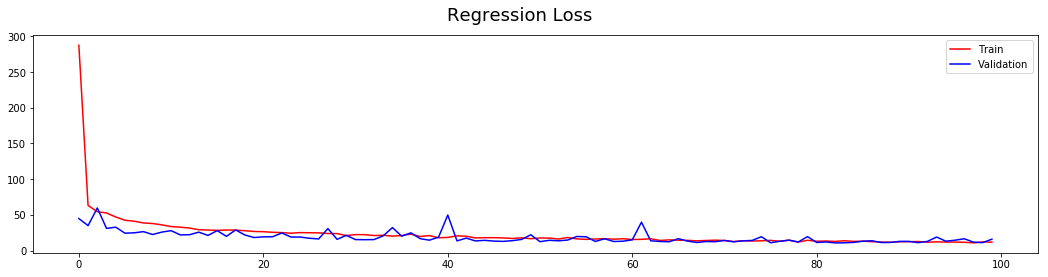

In [0]:
import matplotlib.pyplot as plt                                                 # Import pyplot submodule from matplotlib

def summarize_stats(history):
  # loss 
  plt.figure(figsize=(18,4))                                                    # A figure with a specific size
  plt.subplot(1,1,1)                                                            # Subplot containing one image
  plt.suptitle('Regression Loss',fontsize=18)                                   # This figure will show regression loss
  plt.plot(history.history['loss'], color='red', label='Train')
  plt.plot(history.history['val_loss'], color='blue', label='Validation')
  plt.legend(loc='upper right')
  # accuracy
  
  plt.legend(loc='upper right')
  plt.show()
  

summarize_stats(hist)


This graph tells us that our training and validation sets did equally good once trained for 100 epochs. Now, we will test our model on test data

## Model Evaluation on Test Data
First, we will load stored weights. Then, we will evaluate our model's performance on test data.

In [0]:
model.load_weights(os.path.join(checkpts,'bestweights'))                        # Load checkpoints from 'bestweights' folder
out=model.evaluate(x_test,y_test)                                               # Evaluate the same model with test set
print('MSE for test set:',out)

51/51 [==============================] - 0s 206us/step
MSE for test set: 8.784160595314175


## Model Predictions
Here is the comparison of actual prices and model predicted prices:

In [0]:
predictions=model.predict(x_test)

top_n_results=5

for pred,y in zip(predictions[:top_n_results],y_test[:top_n_results]):
  print('Actual Price: ',y,', Predicted Price: ',pred[0])

Actual Price:  21.7 , Predicted Price:  22.864927
Actual Price:  18.5 , Predicted Price:  21.527649
Actual Price:  22.2 , Predicted Price:  21.320627
Actual Price:  20.4 , Predicted Price:  20.918919
Actual Price:  8.8 , Predicted Price:  8.065931
